In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

In [2]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2)

In [3]:
x = pd.read_csv('vol/intermediate_result/X_opening.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross',axis=1)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [5]:
model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [6]:
import graphviz

In [7]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(model,out_file=None, feature_names=x.columns)

In [8]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 41613376.0\\nmse = 4.491994363696598e+16\\nsamples = 1665\\nvalue = 141540319.054"] ;\n1 [label="opening_gross <= 22074047.0\\nmse = 1.3333822193127832e+16\\nsamples = 1506\\nvalue = 92999937.199"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 4923666241203534.0\\nsamples = 1257\\nvalue = 64781848.271"] ;\n1 -> 2 ;\n3 [label="mse = 3.1478131019987736e+16\\nsamples = 249\\nvalue = 235450289.735"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70351576.0\\nmse = 1.1039811871593587e+17\\nsamples = 159\\nvalue = 601300162.289"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 4.067538845924509e+16\\nsamples = 92\\nvalue = 440868287.554"] ;\n4 -> 5 ;\n6 [label="mse = 1.2226485798747571e+17\\nsamples = 67\\nvalue = 821594676.851"] ;\n4 -> 6 ;\n}'

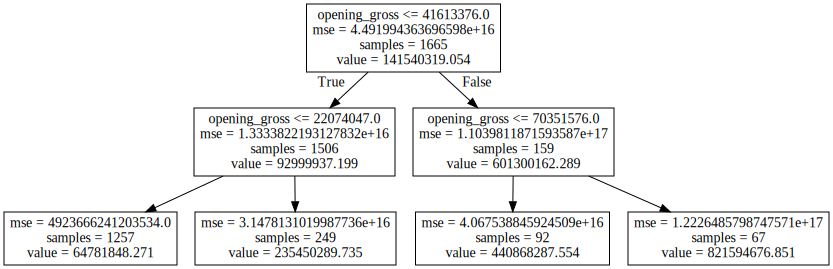

In [9]:
graphviz.Source(treedot)

In [16]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(200)
result = cross_validate(forest,x,y,cv=5, scoring='r2')

In [17]:
test_scores = result['test_score']
train_scores = result['score_time']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.02923293113708496
0.5213657536184281


In [18]:
from sklearn.ensemble  import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
result = cross_validate(forest,x,y,cv=5, scoring='r2')

In [19]:
test_scores = result['test_score']
train_scores = result['score_time']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.026600980758666994
0.5252328655383643
